# Boosting techniques

We will implement,
* AdaBoost
* GradientBoosting
* XGBoost

for MNIST digit recognition classifier

In [2]:
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline

## Loading MNIST data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [5]:
#Flattening 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

 #Normalising
X_train = X_train/255
X_test = X_test/255

In [6]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [7]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

## Some helper functions

In [8]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(estimator, X_train, y_train, cv = cv, scoring='f1_macro')

    print(f"On an average, {name} model has f1 score of " 
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

In [9]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print("# Classification report")
    print(classification_report(y_test, y_pred))

    print("# Confusion matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

## Adaboost for MNIST multiclass classification

In [10]:
abc_pipeline = Pipeline([("classifier", AdaBoostClassifier())])
train_classifiers(abc_pipeline, X_train, y_train.ravel(), cv, "AdaBoostClassifier")

On an average, AdaBoostClassifier model has f1 score of 0.712 +/- 0.016 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion matrix


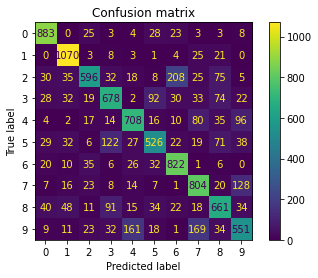

In [11]:
eval(abc_pipeline, X_test, y_test)

## Gradient Boosting for MNIST multiclass classification

In [12]:
gbc_pipeline = Pipeline([("classifier", GradientBoostingClassifier(n_estimators=10))])
train_classifiers(gbc_pipeline, X_train, y_train.ravel(), cv, "GradientBoostingClassifier")

KeyboardInterrupt: 

In [ ]:
eval(gbc_pipeline, X_test, y_test)

## XGBoost for MNIST multiclass classification

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xbc_pipeline = Pipeline([("classifier", XGBClassifier())])
train_classifiers(xbc_pipeline, X_train, y_train.ravel(), cv, "XGBoostClassifier")

In [ ]:
eval(abc_pipeline, X_test, y_test)